In [61]:
from qiskit import QuantumCircuit
import numpy as np

state = (1 / np.sqrt(14)) * np.array([1, 3, 0, 2])
num_qubits = 2
circ = QuantumCircuit(num_qubits)
circ.prepare_state(state, [0, 1])

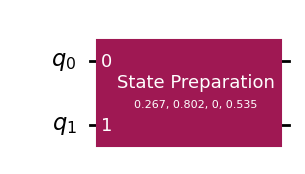

In [62]:
circ.draw('mpl')

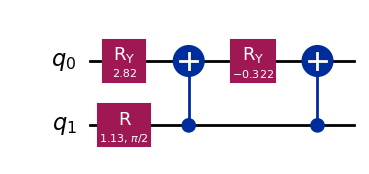

In [63]:
circ.decompose(reps = 4).draw('mpl')

origin image:


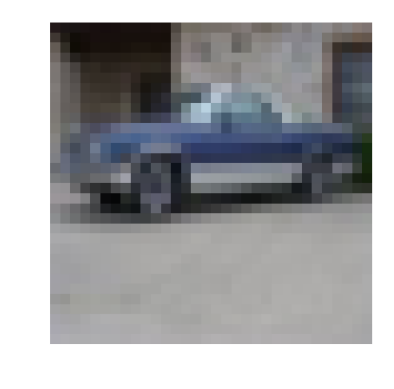

4x4 image:


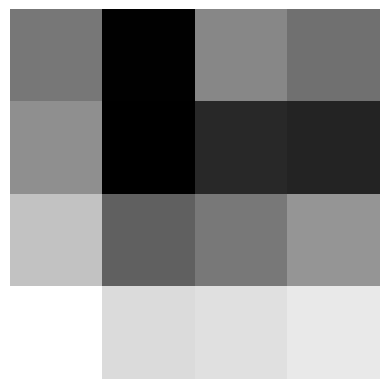

In [64]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = '../data/cifar10-car.png' 
image = Image.open(image_path)

print("origin image:")
plt.imshow(image)
plt.axis('off')
plt.show()

image = image.convert('L') 
image = image.resize((4, 4))
image = np.array(image)

print("4x4 image:")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [65]:
flatten_image = image.flatten()
state = flatten_image / np.linalg.norm(flatten_image)
print(state)

[0.22896883 0.12016804 0.24358386 0.22247326 0.25170332 0.11854414
 0.15589367 0.15102199 0.2987962  0.20785823 0.23059272 0.256575
 0.35563243 0.32153069 0.32640237 0.33452183]


In [66]:
num_qubits = 4
circ = QuantumCircuit(num_qubits)
circ.prepare_state(state, [0, 1, 2, 3])

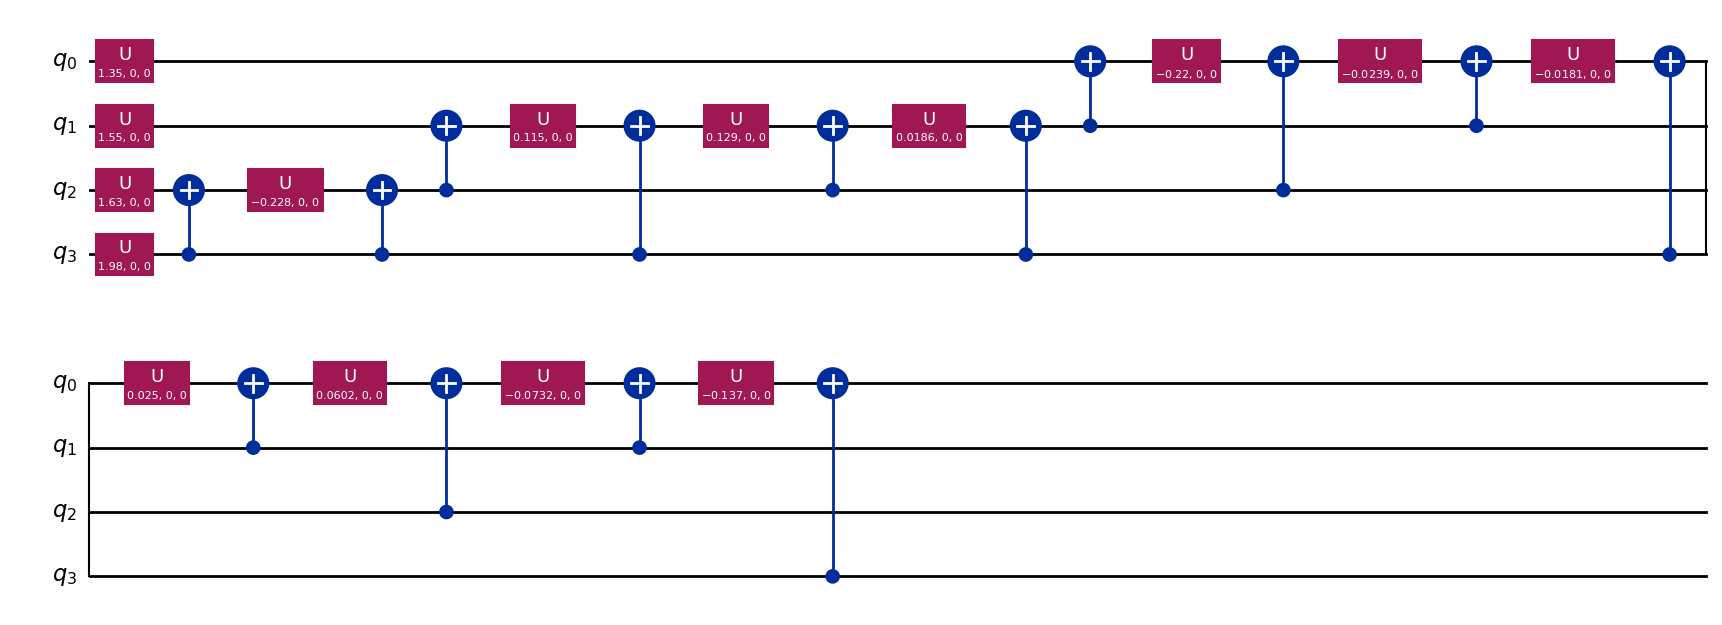

In [67]:
num_qubits = 4
circ = QuantumCircuit(num_qubits)
circ.prepare_state(state, [0, 1, 2, 3])

circ.decompose(reps = 10).draw('mpl')

### Schdmidt decomposition!

In [68]:
import pyqentangle

In [69]:
amplitude = state

state_vector = []
for i in range(4):
    state_vector.append([])
    for j in range(4):
        state_vector[i].append(amplitude[i*4 + j])
            
print(state_vector)
state_vector = np.array(state_vector)

[[np.float64(0.2289688267569165), np.float64(0.12016803673767248), np.float64(0.24358385825203882), np.float64(0.22247325720352878)], [np.float64(0.25170332019377345), np.float64(0.11854414434932556), np.float64(0.15589366928130483), np.float64(0.15102199211626405)], [np.float64(0.29879619945583424), np.float64(0.20785822570840645), np.float64(0.23059271914526341), np.float64(0.2565749973588142)], [np.float64(0.35563243304797665), np.float64(0.3215306928926912), np.float64(0.326402370057732), np.float64(0.3345218319994666)]]


In [70]:
ret = pyqentangle.schmidt_decomposition(state_vector)
ret

[(np.float64(0.9940565721994699),
  array([-0.41626706, -0.34907278, -0.5040656 , -0.67140732]),
  array([-0.57598539, -0.41451843, -0.49413382, -0.50224203])),
 (np.float64(0.08318335947668784),
  array([-0.52831662, -0.56055576, -0.02429963,  0.6372349 ]),
  array([-0.51333613,  0.84034026, -0.16451406,  0.05700348])),
 (np.float64(0.06837045481964059),
  array([ 0.73674247, -0.63670014, -0.22370202,  0.04220026]),
  array([-0.63480659, -0.29067826,  0.62002306,  0.35790803])),
 (np.float64(0.01604808028917849),
  array([ 0.06938166,  0.39816875, -0.8338374 ,  0.37598275]),
  array([ 0.04180249,  0.19367206,  0.58680346, -0.78511489]))]

In [71]:
schmidt_coefficient = [ item[0] for item in ret]
print(schmidt_coefficient)

[np.float64(0.9940565721994699), np.float64(0.08318335947668784), np.float64(0.06837045481964059), np.float64(0.01604808028917849)]
